In [2]:
# Load the important packages
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# Load the datasets
cancer = load_breast_cancer()
print(cancer.data.shape)
print(cancer.target.shape)
X = cancer.data[:, :2]        #[:, :2] → get all rows, but only first 2 columns (features)
y = cancer.target

print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

(569, 30)
(569,)
X Shape:  (569, 2)
y Shape:  (569,)


<h2>linear Kernel

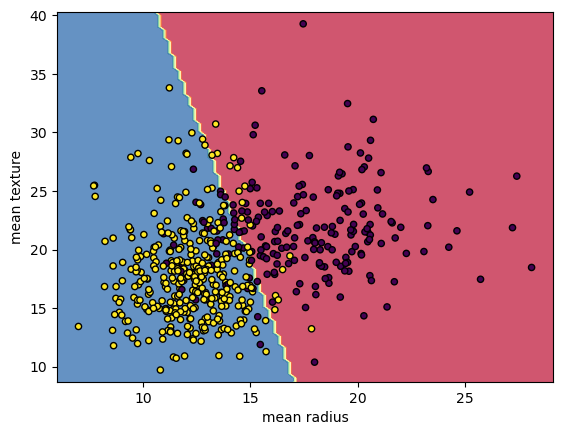

In [5]:
#Training and intitive visualization of Decisonboundry
#Kernal= 'linear'{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 
# Create an SVM (Support Vector Machine) classifier
# kernel="linear" → model will try to separate data using a straight line (linear decision boundary)
# gamma=0.5 → this parameter controls curve flexibility, BUT for linear kernel it is ignored
# C=1.0 → regularization parameter (higher C = less tolerance for misclassification)
svm = SVC(kernel="linear", gamma=0.5, C=1.0)

# Train (fit) the SVM model on feature data X and target labels y
# The model learns the best separating line between the two classes
svm.fit(X, y)

# Plot Decision Boundary
# Plot the decision boundary learned by the SVM model
DecisionBoundaryDisplay.from_estimator(
    svm,                     # ✅ trained SVM model
    X,                       # ✅ input feature data (only 2 features so 2D boundary can be drawn)
    response_method="predict",  # ✅ use model's predicted class labels to draw regions
    cmap=plt.cm.Spectral,       # ✅ colormap for different regions (color background)
    alpha=0.8,                  # ✅ transparency of boundary shading (0 = transparent, 1 = solid)
    xlabel=cancer.feature_names[0], # ✅ label for x-axis = first feature name
    ylabel=cancer.feature_names[1]  # ✅ label for y-axis = second feature name
)

# Scatter plot
# Scatter plot of the data points (two selected features)
plt.scatter(
    X[:, 0],     # ✅ x-axis values (Feature 1)
    X[:, 1],     # ✅ y-axis values (Feature 2)
    c=y,         # ✅ color points according to class label (0 or 1)
    s=20,        # ✅ size of each point
    edgecolors="k"  # ✅ black border around each point
)

# Display the plot on the screen
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
# 80% data for training, 20% data for testing
# random_state=42 ensures reproducibility (same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)
print('**********************')
print(X_train.shape)
print(X_test.shape)

# Create SVM classifier with linear kernel
# C=1.0 → regularization parameter (controls margin vs misclassification trade-off)
svm = SVC(kernel="linear", C=1.0)

# Train the SVM model on the training data
svm.fit(X_train, y_train)

# Make predictions on training data
y_train_pred = svm.predict(X_train)

# Make predictions on test data
y_test_pred = svm.predict(X_test)

# Calculate accuracy for both training and testing sets
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print accuracy values rounded to 4 decimal places
print("Training Accuracy:", round(train_acc, 4))
print("Testing Accuracy:", round(test_acc, 4))


(569, 2)
(569,)
**********************
(455, 2)
(114, 2)
Training Accuracy: 0.8879
Testing Accuracy: 0.9035


In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(X.shape)
# Train-test split
# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print(X.shape)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel="linear", C=1.0)
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Accuracy
print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


(569, 30)
(569, 30)
Test Accuracy: 0.9561

Confusion Matrix:
[[39  4]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<h2>Polynomial kernel

In [ ]:
# Load the important packages
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# Load the datasets
print(X.shape)
cancer = load_breast_cancer()
print(cancer.data.shape)
print(cancer.target.shape)
X = cancer.data[:, :2]        #[:, :2] → get all rows, but only first 2 columns (features)
y = cancer.target
print(X.shape)
#Training and intitive visualization of Decisonboundry
#Kernal= 'poly'                                             #{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 
svm = SVC(kernel="poly", gamma=0.5, C=1.0)
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(svm, X, response_method="predict", cmap=plt.cm.Spectral, alpha=0.8, 
                                   xlabel=cancer.feature_names[0],ylabel=cancer.feature_names[1],)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],  c=y, s=20, edgecolors="k")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM with Polynomial Kernel
svm = SVC(kernel="poly", degree=3, gamma=0.5, C=1.0)  # degree=3 default poly degree
svm.fit(X_train, y_train)

# Predictions
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Polynomial Kernel SVM")
print("Training Accuracy:", round(train_acc, 4))
print("Testing Accuracy:", round(test_acc, 4))


<b> rbf kernal

In [ ]:
#Training and intitive visualization of Decisonboundry
#Kernal= 'rbf'                                             #{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 
svm = SVC(kernel="rbf", gamma=0.5, C=1)
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(svm, X, response_method="predict", cmap=plt.cm.Spectral, alpha=0.8, 
                                   xlabel=cancer.feature_names[0],ylabel=cancer.feature_names[1],)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],  c=y, s=20, edgecolors="k")
plt.show()